In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.optimize import minimize

sns.set(context="talk")

In [2]:
df = pd.read_csv("ex2data2.txt", names=["Test1", "Test2", "Accepted"])
df.describe()

,Test1,Test2,Accepted
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


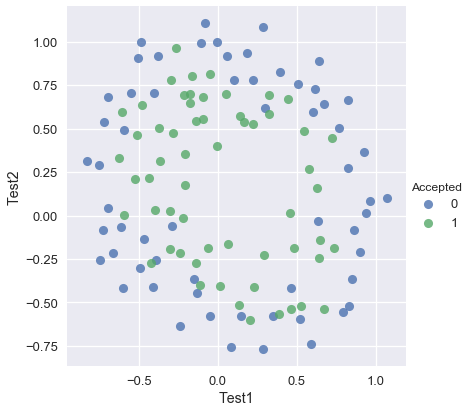

In [3]:
sns.lmplot(x="Test1", y="Test2", data=df,
           fit_reg=False, # No regression line, 
           hue="Accepted",
           size=6, # Height in inch
           aspect=1)  # Ratio of width to height
plt.show()

**Define hypothesis and cost function**

In [4]:
# Logistic regression function
def hypo(theta, X):
    h = 1 / (1 + np.exp(-X.dot(theta)))
    return h.reshape((-1, 1))

# Cost function
def costFun(theta, X, y, lamb=0):
    m = len(y)
    h = hypo(theta, X)
    return 1/m * np.sum(-y*np.log(h) - (1-y)*np.log(1-h)) + lamb/(2*m) * np.sum(theta[1:]**2)

# Gradient function
def gradient(theta, X, y, lamb=0):
    m = len(y)
    h = hypo(theta, X)
    gradient = 1/m * (h - y).T.dot(X).T
    gradient[1:, 0] = gradient[1:, 0] + (lamb/m*theta[1:])
    return gradient.ravel()

# Map Feature
def mapFeature(X, degree=1):
    if X.ndim == 1:
        X = X.reshape(1, -1)
    nrows = X.shape[0]
    ncols = int((degree+2)*(degree+1)/2)
    mapX = np.ones((nrows, ncols))
    for i in range(1, degree+1):
        for j in range(0, i+1):
            mapX[:, int((i+1)*i/2)+j] = (X[:, 0]**(i-j))*(X[:, 1]**j)
    return mapX

X = df.values[:, 0:len(df.columns)-1]
degree = 6
X = mapFeature(X, degree)
y = df.values[:, len(df.columns)-1:len(df.columns)]
theta = np.zeros([X.shape[1]])

**Minimize cost function and find learned parameters theta**

In [5]:
lamb = 1
res = minimize(costFun, theta, args=(X, y, lamb), jac=gradient, method="TNC")
print(res)

     fun: 0.52900272996453102
     jac: array([ -2.15160381e-06,   6.79492847e-07,  -3.48980051e-07,
         8.75746514e-07,  -4.08249454e-08,  -9.34006928e-07,
        -5.14473432e-07,   1.70711918e-08,   1.52868168e-08,
        -9.72788566e-07,   6.95560913e-08,   3.55329017e-08,
        -2.79672808e-07,   1.79704818e-07,   2.33245983e-07,
         1.47200704e-07,  -2.12067308e-07,   6.16694143e-07,
        -9.26356303e-08,  -5.27659307e-08,  -1.48172822e-06,
         2.31295473e-07,   1.80330709e-07,  -1.31526126e-07,
        -7.17689520e-08,  -4.12214585e-07,   1.65721441e-08,
        -7.34918968e-07])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 32
     nit: 7
  status: 1
 success: True
       x: array([ 1.27271026,  0.62529965,  1.18111687, -2.019874  , -0.91743189,
       -1.4316693 ,  0.12393227, -0.36553118, -0.35725406, -0.17516292,
       -1.45817009, -0.05098418, -0.61558555, -0.27469165, -1.19271297,
       -0.2421784 , -0.20603301, -0.04466178, -0.27778948, -0.29

**Plot decision boundary with scatter plot of data**

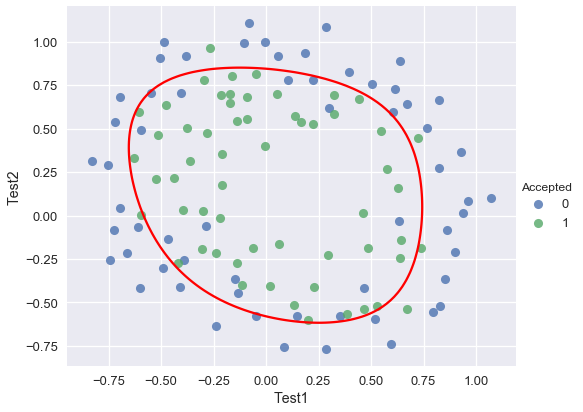

In [6]:
# Plot scatter
sns.lmplot(x="Test1", y="Test2", data=df,
           fit_reg=False, # No regression line, 
           hue="Accepted",
           size=6, # Height in inch
           aspect=1.25)  # Ratio of width to height
# Plot decision line
x_plot = np.linspace(df.Test1.min(), df.Test1.max(), 100)
y_plot = np.linspace(df.Test2.min(), df.Test2.max(), 100)
z_plot = np.zeros((len(x_plot), len(y_plot)))
for i in range(len(x_plot)):
    for j in range(len(y_plot)):
        x_predict = np.array([x_plot[i], y_plot[j]])
        x_predict = mapFeature(x_predict, degree)
        z_plot[i, j] = hypo(res.x, x_predict).ravel()[0]
plt.contour(x_plot, y_plot, z_plot.T, [0.5], colors="red")
plt.show()

**Evaluating logistic regression**

In [7]:
def predict(theta, X):
    return (hypo(theta, X)>=0.5).astype(np.float)

accuracy = np.mean((predict(res.x, X)==y).astype(np.float))
print("Accuracy = {0}%".format(accuracy*100))

Accuracy = 83.05084745762711%
